**IMPORTING NECCESSORY LIBRARIES**

In [1]:
import pandas as pd
import nltk
from matplotlib import pyplot as plt
import seaborn as snc
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from nltk.corpus import wordnet,stopwords
from nltk.stem import WordNetLemmatizer
lemmatize=WordNetLemmatizer()
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**READING AND ANALYSING DATASETS**

In [4]:
fake=pd.read_csv('/content/drive/MyDrive/Project/NLP/Fake.csv')
fake['label']='fake'
real=pd.read_csv('/content/drive/MyDrive/Project/NLP/True.csv')
real['label']='real'
df=pd.concat([fake,real],ignore_index=True)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [6]:

df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

**PLOTTING**

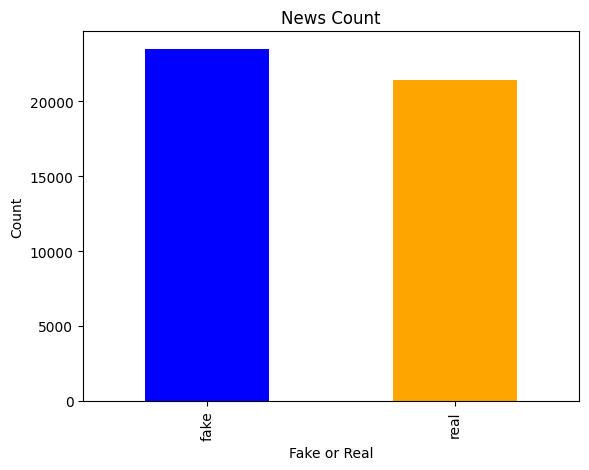

In [7]:
label_count=df['label'].value_counts()

label_count.plot(kind='bar',color=['blue','orange'])
plt.title('News Count')
plt.xlabel('Fake or Real')
plt.ylabel('Count')
plt.show()


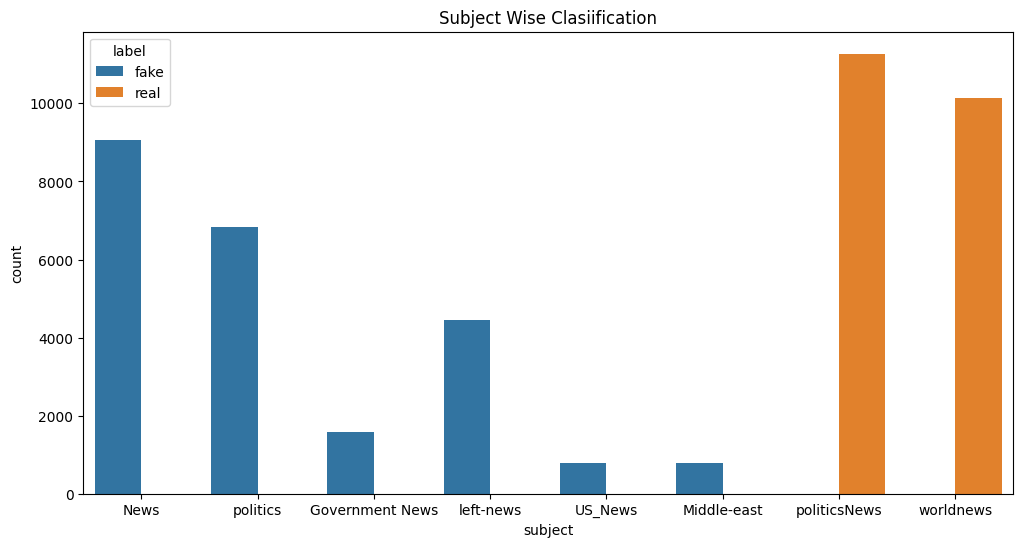

In [8]:
plt.figure(figsize=(12,6))
snc.countplot(data=df,x='subject',hue='label')
plt.title('Subject Wise Clasiification')
plt.show()

**WORDCLOUD**

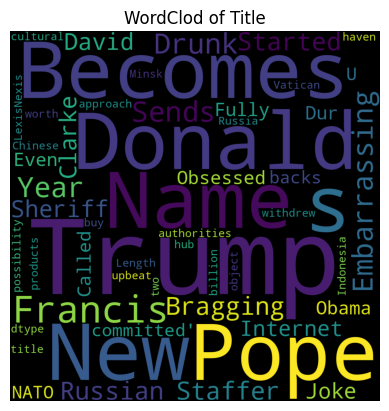

In [9]:
title=df['title']
title=str(title)
wordcloud=WordCloud(width=1000,height=1000).generate(title)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordClod of Title')
plt.show()

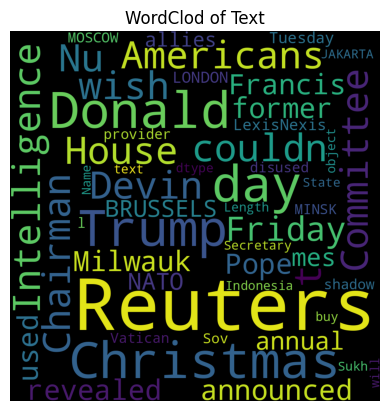

In [10]:
text=df['text']
text=str(text)
wordcloud=WordCloud(width=1000,height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordClod of Text')
plt.show()


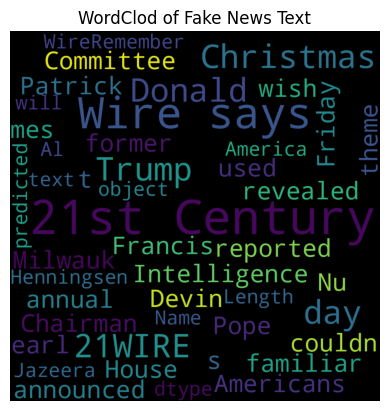

In [11]:
fake_text=fake['text']
text=str(fake_text)
wordcloud_fake=WordCloud(width=1000,height=1000).generate(text)
plt.imshow(wordcloud_fake)
plt.axis('off')
plt.title('WordClod of Fake News Text')
plt.show()

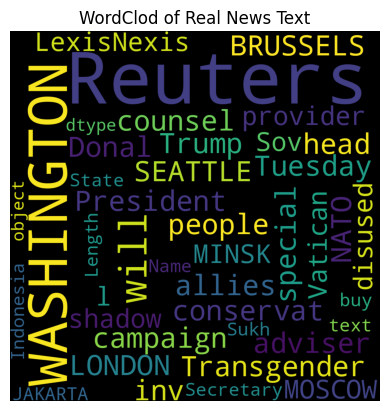

In [12]:
real_text=real['text']
text=str(real_text)
wordcloud_real=WordCloud(width=1000,height=1000).generate(text)
plt.imshow(wordcloud_real)
plt.axis('off')
plt.title('WordClod of Real News Text')
plt.show()

In [62]:
def get_top_ngram(corpus, n=None):
  vec=CountVectorizer(ngram_range=(n,n), stop_words='english').fit(corpus )
  bag_of_words=vec.transform(corpus )
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
  return words_freq[:10]

Text(0.5, 1.0, 'Top 10 Frequent Words In Fake News')

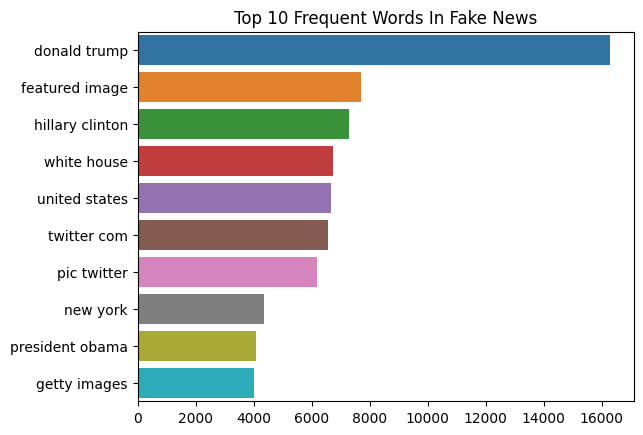

In [67]:
top_n_bigrams=get_top_ngram(df[df['label']=='fake']['text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
snc.barplot(x=y,y=x)
plt.title('Top 10 Frequent Words In Fake News')


Text(0.5, 1.0, 'Top 10 Frequent Words In Real News')

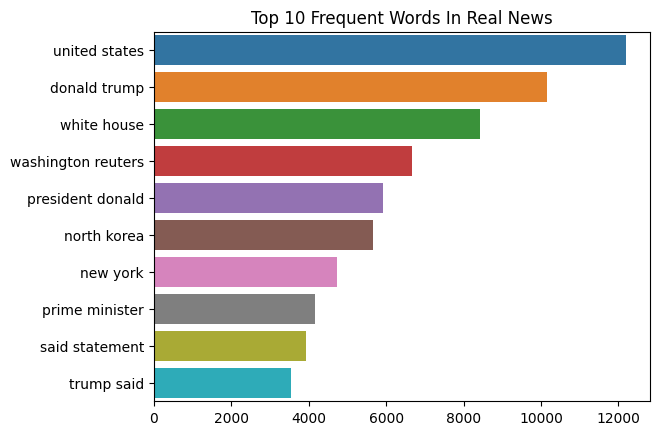

In [68]:
top_n_bigrams=get_top_ngram(df[df['label']=='real']['text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
snc.barplot(x=y,y=x)
plt.title('Top 10 Frequent Words In Real News')


In [15]:
fake1=fake[:2000]
real1=real[:2000]
df1=pd.concat([fake1,real1],ignore_index=True)
df1.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake




**PARTS OF SPEECH TAGGER**

In [27]:
text=[]
for i in df1.text:
    tk=nltk.sent_tokenize(i)
    text.append(tk)
a1=[]
for i in range(len(text)):
  a=str(text[i])
  a=re.sub('[^a-zA-Z]',' ',a)
  pos_tagged_text=nltk.pos_tag(nltk.word_tokenize(a))
  a1.append(pos_tagged_text)


In [28]:
def pos_tagger(nltk_tag):
  nltk_tag=str(nltk_tag)
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None
wordnet_tagged=list(map(lambda x: (x[0],pos_tagger(x[1])),a1))


**LEMMATIZATION**

In [29]:
lemmatized_sentence=[]
for word,tag in wordnet_tagged:
  if word not in set(stopwords.words('english')):
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatize.lemmatize(word, tag))
  else:
    pass

**COUNT VECTORIZER**

In [30]:
count_vectorizer=CountVectorizer()
vector=count_vectorizer.fit_transform([str.join(' ', x) for x in lemmatized_sentence])
feature_name_count=count_vectorizer.get_feature_names_out()
array_count=vector.toarray()
x_count=pd.DataFrame(array_count)


**TFIDF VECTORIZER**

In [31]:
tfidf_vectorizer=TfidfVectorizer()
vector=tfidf_vectorizer.fit_transform([str.join(' ', x) for x in lemmatized_sentence])
feature_name_tfidf=tfidf_vectorizer.get_feature_names_out()
array_tfidf=vector.toarray()
x_tfidf=pd.DataFrame(array_tfidf)

In [32]:
y=df1.label

**TRAIN TEST SPLIT**

In [33]:
x_train_c,x_test_c,y_train_c,y_test_c=train_test_split(x_count,y,test_size=.2,random_state=0)
x_train_tf,x_test_tf,y_train_tf,y_test_tf=train_test_split(x_tfidf,y,test_size=.2,random_state=0)

**MODEL SELECTION**


In [34]:
# USING COUNT VECTORIZER
models={
    'Logistic':{'model':LogisticRegression(),'params':{}},
    'Random Forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[5,9,41]}},
    'Decision Tree':{'model':DecisionTreeClassifier(),'params':{}},
    'Multinomial':{'model':MultinomialNB(),'params':{}},
    'SVM':{'model':SVC(),'params':{'gamma':[1,2,100],'C':[1,2,5,100],'kernel':['linear','poly','sigmoid','rbf']}}
}

result=[]

for i in models:
  a=models.get(i)
  model=a.get('model')
  params=a.get('params')
  cv=GridSearchCV(model,params,cv=5,return_train_score=True)
  cv.fit(x_count,y)
  bp=cv.best_params_
  bs=cv.best_score_
  t_res={'model':i,'best params':bp,'best score':bs,'vectorizer':'CountVectorizer'}
  result.append(t_res)

# USING TFIDF VECTORIZER
models={
    'Logistic':{'model':LogisticRegression(),'params':{}},
    'Random Forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[5,9,41]}},
    'Decision Tree':{'model':DecisionTreeClassifier(),'params':{}},
    'Multinomial':{'model':MultinomialNB(),'params':{}},
    'SVM':{'model':SVC(),'params':{'gamma':[1,2,100],'C':[1,2,5,100],'kernel':['linear','poly','sigmoid','rbf']}}
}

for i in models:
  a=models.get(i)
  model=a.get('model')
  params=a.get('params')
  cv=GridSearchCV(model,params,cv=5,return_train_score=True)
  cv.fit(x_tfidf,y)
  bp=cv.best_params_
  bs=cv.best_score_
  t_res={'model':i,'best params':bp,'best score':bs,'vectorizer':'TfidfVectorizer'}
  result.append(t_res)

f=pd.DataFrame(result)
f

,model,best params,best score,vectorizer
0,Logistic,{},0.95275,CountVectorizer
1,Random Forest,{'n_estimators': 41},0.95525,CountVectorizer
2,Decision Tree,{},0.95525,CountVectorizer
3,Multinomial,{},0.92575,CountVectorizer
4,SVM,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.95550,CountVectorizer
5,Logistic,{},0.94750,TfidfVectorizer
6,Random Forest,{'n_estimators': 41},0.95525,TfidfVectorizer
7,Decision Tree,{},0.95625,TfidfVectorizer
8,Multinomial,{},0.93625,TfidfVectorizer
9,SVM,"{'C': 5, 'gamma': 1, 'kernel': 'linear'}",0.95550,TfidfVectorizer


In [35]:
f.sort_values('best score').tail(1)

,model,best params,best score,vectorizer
7,Decision Tree,{},0.95625,TfidfVectorizer


In [36]:
model = DecisionTreeClassifier()
model.fit(x_train_tf,y_train_tf)

DecisionTreeClassifier()

In [37]:
text=["""Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that.
 Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.
 The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows
 stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest
 Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America!
 As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters,
 and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J.
 Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president
  sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even
  llow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan
  (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make
  2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31,
   2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they
    all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene
    (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s
    Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and
    lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing
    new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s,
    Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump
     s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine
      (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years,
       his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term
       haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So,
        to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old
         men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."""]


a1=[]
for i in range(len(text)):
  a=str(text[i])
  a=re.sub('[^a-zA-Z]',' ',a)
  pos_tagged_text=nltk.pos_tag(nltk.word_tokenize(a))
  a1.append(pos_tagged_text)

wordnet_tagged=list(map(lambda x: (x[0],pos_tagger(x[1])),a1))

lemmatized_sentence=[]
for word,tag in wordnet_tagged:
  if word not in set(stopwords.words('english')):
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatize.lemmatize(word,tag))
  else:
    pass

vector=tfidf_vectorizer.transform([str.join(' ', x) for x in lemmatized_sentence])
array_pred=vector.toarray()
x_pred=pd.DataFrame(array_pred)

model.predict(x_pred)

array(['fake'], dtype=object)